In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv("malnutrition-estimates.csv")

In [24]:
data.head()

,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Report Author,Source,Short Source,U5 Population ('000s)
0,AFG,AFGHANISTAN,1997,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,6.5,53.2,44.9,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877
1,AFG,AFGHANISTAN,2004,2004,0,1.0,1.0,1.0,946,3.5,8.6,4.6,59.3,32.9,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353
2,AFG,AFGHANISTAN,2013,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,5.3,40.4,24.6,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573
3,AFG,AFGHANISTAN,2018,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,4.1,38.2,19.1,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443
4,ALB,ALBANIA,1996-98,1997,2,0.0,0.0,0.0,"7,642",NaN,8.1,9.5,20.4,7.1,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225


In [4]:
data = data.drop(["Unnamed: 0"], axis = 1)

In [5]:
data = data.drop(["Notes"], axis = 1)

In [6]:
data.describe()

,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,924.000000,924.00000,924.000000,924.000000,924.000000,696.000000,877.000000,788.000000,887.000000,902.000000,924.000000
mean,2003.730519,1.24026,0.349567,0.424242,0.455628,2.191523,6.955644,6.434772,29.063134,15.841242,6182.704516
std,8.792535,0.92202,0.477091,0.494495,0.686648,1.912586,5.039402,4.638849,15.834657,12.509643,16795.938144
min,1983.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1996.000000,1.00000,0.000000,0.000000,0.000000,0.800000,2.900000,2.900000,16.650000,4.925000,559.669000
50%,2004.500000,1.00000,0.000000,0.000000,0.000000,1.600000,5.900000,5.500000,29.200000,13.400000,1795.523000
75%,2011.000000,2.00000,1.000000,1.000000,1.000000,2.900000,9.700000,8.700000,40.200000,23.100000,4194.214000
max,2019.000000,3.00000,1.000000,1.000000,2.000000,12.900000,25.300000,30.100000,73.600000,66.800000,132966.782000


In [7]:
data.isnull().sum()

ISO code                   0
Country                    0
Survey Year                0
Year                       0
Income Classification      0
LDC                        0
LIFD                       0
LLDC or SID2               0
Survey Sample (N)         63
Severe Wasting           228
Wasting                   47
Overweight               136
Stunting                  37
Underweight               22
Report Author              0
Source                     0
Short Source               0
U5 Population ('000s)      0
dtype: int64

In [8]:
data1 = data[ data["Severe Wasting"].isnull()]

In [9]:
data1.describe()

,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,228.000000,228.000000,228.000000,228.000000,228.000000,0.0,181.000000,105.000000,192.000000,206.000000,228.000000
mean,1997.267544,1.543860,0.214912,0.258772,0.337719,NaN,7.289503,7.260952,27.562500,15.851456,6290.170658
std,8.118799,0.925796,0.411665,0.438924,0.653677,NaN,5.703259,3.933840,18.209863,13.874615,17359.501678
min,1985.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.200000,0.000000,0.000000,8.397000
25%,1992.000000,1.000000,0.000000,0.000000,0.000000,NaN,3.100000,4.900000,13.825000,4.250000,714.713000
50%,1995.000000,2.000000,0.000000,0.000000,0.000000,NaN,5.900000,6.400000,25.050000,11.950000,1873.587000
75%,2002.000000,2.000000,0.000000,1.000000,0.000000,NaN,9.800000,9.500000,41.025000,23.175000,4197.185500
max,2019.000000,3.000000,1.000000,1.000000,2.000000,NaN,25.300000,22.000000,70.900000,66.800000,126145.646000


In [10]:
data1.isnull().sum()

ISO code                   0
Country                    0
Survey Year                0
Year                       0
Income Classification      0
LDC                        0
LIFD                       0
LLDC or SID2               0
Survey Sample (N)         34
Severe Wasting           228
Wasting                   47
Overweight               123
Stunting                  36
Underweight               22
Report Author              0
Source                     0
Short Source               0
U5 Population ('000s)      0
dtype: int64

In [27]:
datarev = data[data['Severe Wasting'].notna()]

In [28]:
datarev.describe()

,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,683.00000,695.000000,696.000000,696.000000
mean,2005.847701,1.140805,0.393678,0.478448,0.494253,2.191523,6.868822,6.30776,29.477698,15.838218,6147.500091
std,7.934068,0.899401,0.488916,0.499895,0.693212,1.912586,4.852681,4.72767,15.101252,12.086916,16619.789633
min,1983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.300000,0.200000,1.000000
25%,2000.000000,0.000000,0.000000,0.000000,0.000000,0.800000,2.900000,2.80000,17.300000,5.300000,523.553250
50%,2007.000000,1.000000,0.000000,0.000000,0.000000,1.600000,5.900000,5.30000,30.000000,13.750000,1793.550500
75%,2012.000000,2.000000,1.000000,1.000000,1.000000,2.900000,9.625000,8.50000,39.950000,22.800000,4194.214000
max,2019.000000,3.000000,1.000000,1.000000,2.000000,12.900000,24.600000,30.10000,73.600000,61.200000,132966.782000


In [29]:
datarev.isna().sum()

ISO code                  0
Country                   0
Survey Year               0
Year                      0
Income Classification     0
LDC                       0
LIFD                      0
LLDC or SID2              0
Survey Sample (N)        29
Severe Wasting            0
Wasting                   0
Overweight               13
Stunting                  1
Underweight               0
Report Author             0
Source                    0
Short Source              0
U5 Population ('000s)     0
dtype: int64

In [30]:
datarev = datarev[datarev["Survey Sample (N)"].notna()]

In [31]:
df = datarev[datarev["Overweight"].notna()]

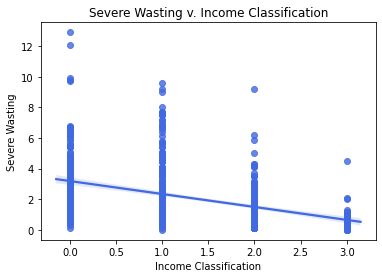

r-squard value: 0.15107411248904848


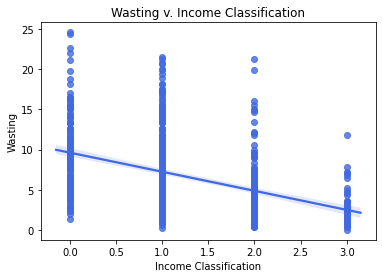

r-squard value: 0.18685417957509737


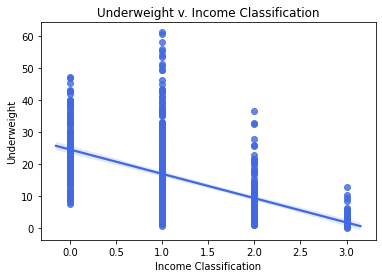

r-squard value: 0.3075553761390828


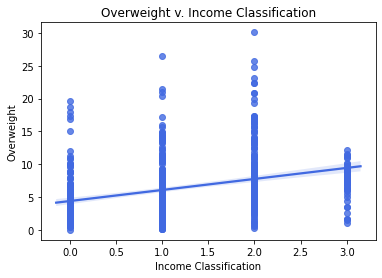

r-squard value: 0.10263396955840484


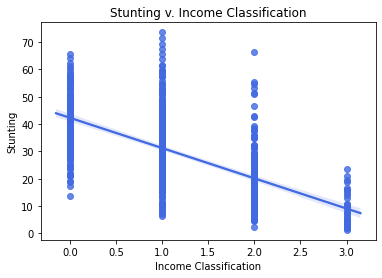

r-squard value: 0.42036930469251954


In [32]:
dfreg = df[["Severe Wasting", "Wasting", "Underweight", "Overweight", "Stunting"]]
for feature in dfreg:
    sns.regplot(x = df["Income Classification"], y = df[feature], color = "royalblue", fit_reg = True)
    plt.title(f"{feature} v. Income Classification")
    plt.show()
    print(f"r-squard value: {stats.pearsonr(df['Income Classification'], dfreg[feature])[0] ** 2}")

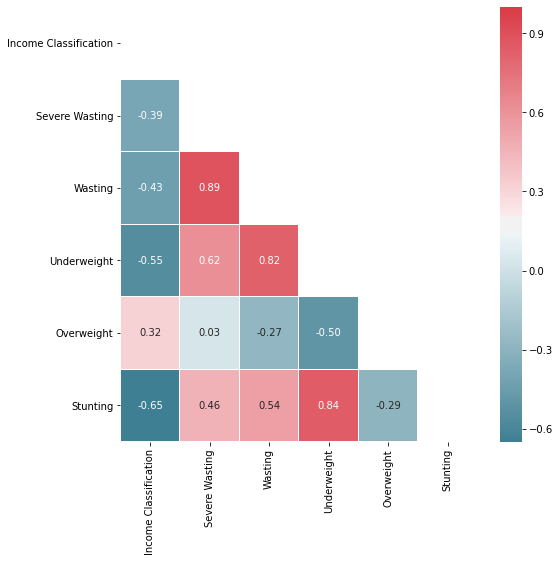

In [33]:
dfcorr = df[["Income Classification", "Severe Wasting", "Wasting", "Underweight", "Overweight", "Stunting"]]
corr = dfcorr.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.ylim(0 ,7)
sns.heatmap(corr, linewidths=.2, annot=True, fmt=".2f", mask=dropSelf, cmap = colormap)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split

X = dfreg
y = df['Income Classification']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [56]:
X_valid, X_train = X_train[:100], X_train[100:]
y_valid, y_train = y_train[:100], y_train[100:]

In [45]:
import tensorflow as tf
from tensorflow import keras

Using TensorFlow backend.


In [68]:
#Creating Model through Keras (Model object & params)
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_dim = 5, activation="relu", name = "Input"))
model.add(keras.layers.Dense(4, activation="softmax", name = "3-softmax"))

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 12)                84        
_________________________________________________________________
3-softmax (Dense)            (None, 3)                 39        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


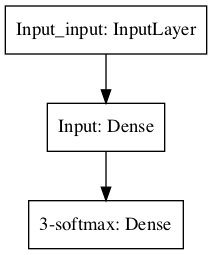

In [51]:
tf.keras.utils.plot_model(model)

In [69]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [84]:
model_history = model.fit(X_train, y_train, epochs = 30,
                          validation_data = (X_valid, y_valid))

W0530 00:29:10.297200 4670432704 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 426 samples, validate on 100 samples
Epoch 1/30
426/426 [==============================] - 0s 232us/sample - loss: 0.7379 - accuracy: 0.6362 - val_loss: 0.7419 - val_accuracy: 0.7000
Epoch 2/30
426/426 [==============================] - 0s 240us/sample - loss: 0.7342 - accuracy: 0.6667 - val_loss: 0.8644 - val_accuracy: 0.5700
Epoch 3/30
426/426 [==============================] - 0s 119us/sample - loss: 0.7405 - accuracy: 0.6854 - val_loss: 1.1058 - val_accuracy: 0.5200
Epoch 4/30
426/426 [==============================] - 0s 250us/sample - loss: 0.7626 - accuracy: 0.6549 - val_loss: 0.8768 - val_accuracy: 0.5900
Epoch 5/30
426/426 [==============================] - 0s 149us/sample - loss: 0.7316 - accuracy: 0.6878 - val_loss: 0.9501 - val_accuracy: 0.5000
Epoch 6/30
426/426 [==============================] - 0s 132us/sample - loss: 0.7366 - accuracy: 0.6643 - val_loss: 0.9465 - val_accuracy: 0.5500
Epoch 7/30
426/426 [==============================] - 0s 168us/sample - loss: 

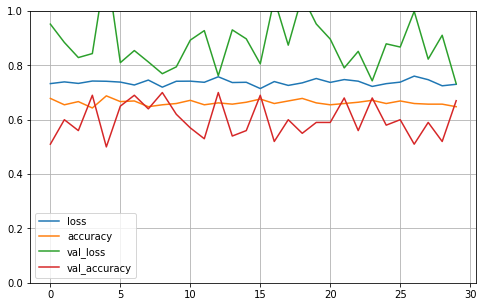

In [82]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [85]:
model.evaluate(X_test, y_test)

W0530 00:29:33.221372 4670432704 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


132/132 [==============================] - 0s 86us/sample - loss: 1.7764 - accuracy: 0.4242


[1.776368347081271, 0.42424244]

In [86]:



modeldic = {}
for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    modeldic[np.sqrt(mean_squared_error(y_test, predictions))] = name
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))
    print(f"accuracy score : {accuracy_score(y_test, predictions)}")
print(f"\nBest Prefroming model: {modeldic[min(modeldic)]}")

DecisionTree : 0.7929614610987591
accuracy score : 0.5075757575757576
Linear Regression : 0.7431336167873736


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [25]:
data["Survey Sample (N)"] = data["Survey Sample (N)"].str.replace(',', '')

In [42]:
y_test

724    0
725    0
726    2
729    2
730    2
      ..
919    1
920    1
921    1
922    1
923    1
Name: Income Classification, Length: 132, dtype: int64